# Group 7 Final Project Week 1   
Lauren Enriquez, Anita Silver, Jiaxin Li, Huoran Yuan

The assigned data were gzip Illumina reads in FASTQ format:  
Path: /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_7_S30_L004_R1_001.fastq.gz  
      /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_7_S30_L004_R2_001.fastq.gz  

We copied the datas to our own folder with command:

$ cp /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_7_S30_L004_R1_001.fastq.gz /home/jiaxin/project

$ cp /bigdata/FinalProject_data/190724_SARA_Genomes/SARA_7_S30_L004_R2_001.fastq.gz /home/jiaxin/project

**First unzip the sequence:**  
$ gunzip SARA_7_S30_L004_R1_001.fastq.gz

$ gunzip SARA_7_S30_L004_R2_001.fastq.gz 
  

**Second run the SPAdes to do the genome assembly:**
(SPAdes Terminal Command:(the fasta files are sored in jiaxin@3.91.150.121:/home/jiaxin/project, and it's the current address ./ when we run the SPAdes)

$ spades.py -o /bigdata/FinalProject_groups/Group_7 -1 ./SARA_7_S30_L004_R1_001.fastq -2 ./SARA_7_S30_L004_R2_001.fastq -t 1


### Define a function to view assembly-stats's output in notebook

In [2]:
import subprocess as sub

def assembly_stats(filename):
    R1 = sub.run("assembly-stats %s"%filename,
                stdout = sub.PIPE,
                shell = True)
    print(R1.stdout.decode())

assembly_stats("./spades_outputs/contigs.fasta")  
stats for ./spades_outputs/contigs.fasta  
sum = 4912502, n = 166, ave = 29593.39, largest = 351593  
N50 = 171259, n = 10  
N60 = 129379, n = 14  
N70 = 97600, n = 18  
N80 = 81067, n = 24  
N90 = 36944, n = 33  
N100 = 56, n = 166  
N_count = 0  
Gaps = 0  

assembly_stats("./spades_outputs/scaffolds.fasta")

stats for ./spades_outputs/scaffolds.fasta  
sum = 4913156, n = 158, ave = 31095.92, largest = 370039  
N50 = 177884, n = 9  
N60 = 150377, n = 12  
N70 = 113499, n = 15  
N80 = 81302, n = 21    
N90 = 38291, n = 29  
N100 = 56, n = 158  
N_count = 800  
Gaps = 8  

N50 for contigs = 171259  
N50 for scaffolds = 177884  
Since scaffolds are created by chaining contigs together using additional information about the relative position and orientation of the contigs in the genome, their fragments are usually longer than those of contigs, therefore, the N50 is larger for scaffolds. 

In [10]:
with open("./spades_outputs/contigs.fasta") as contigs:
    contig_len = []
    for line in contigs:
        if line.startswith(">"):
            word_list = line.split("_")
            contig_len.append(int(word_list[3]))
#print(contig_len)

**Contig Length Histogram:**

<function matplotlib.pyplot.show(*args, **kw)>

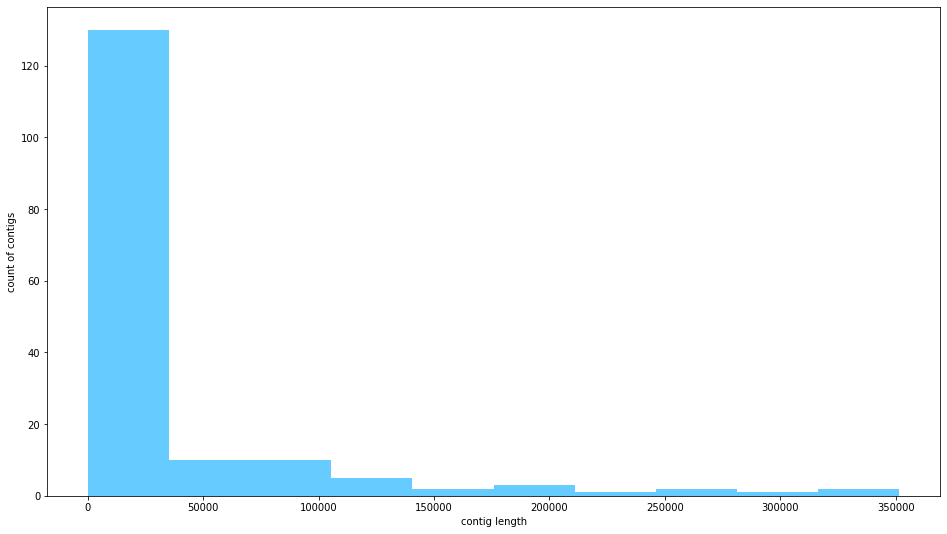

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize = [16,9])
plt.hist(contig_len,facecolor = '#66CCFF')
plt.xlabel("contig length")
plt.ylabel("count of contigs")
plt.show

The histogram is not uniformly distributed and it looks Gaussian with only one peak, indicating the contigs are mostly lengthed at 0~50,000 bps. The fragments have simialr lengths. 

### SeqMatch Results

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

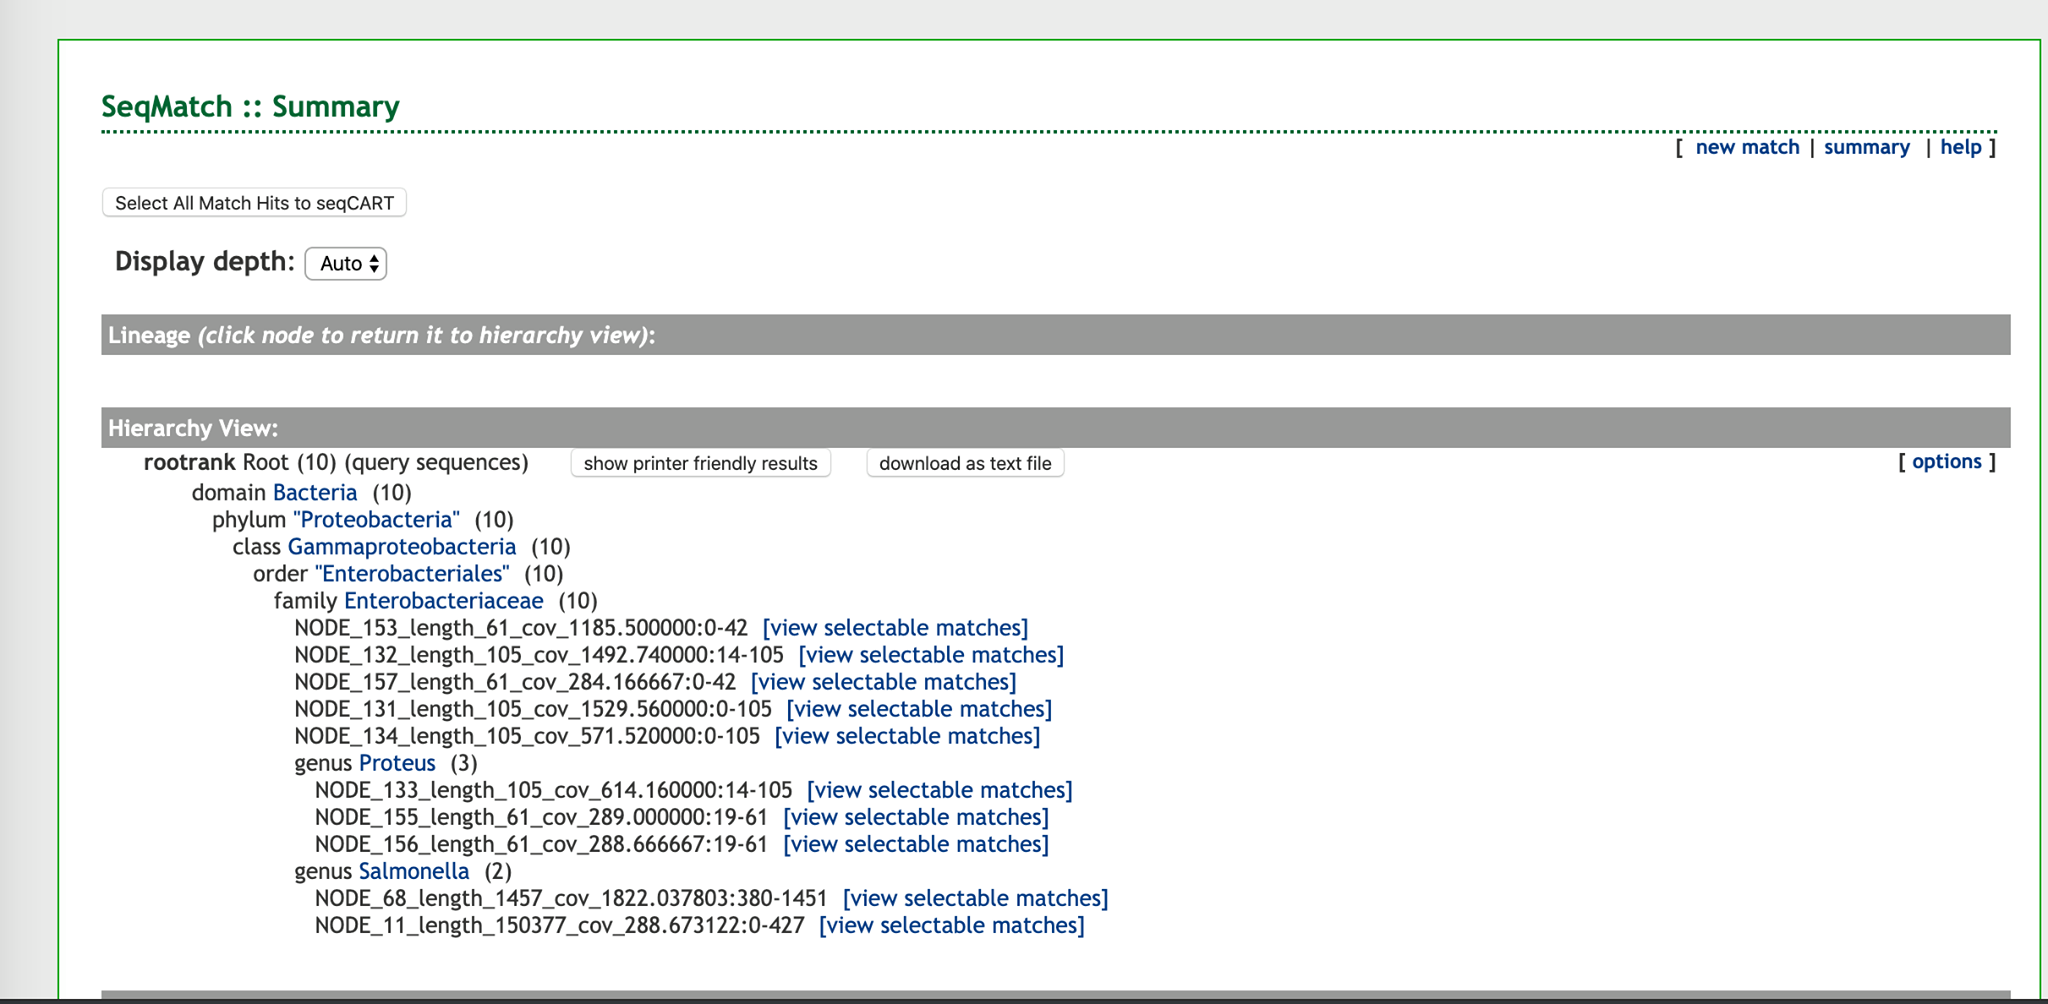

In [4]:
Image("SeqMatch_7.png", width=1000, height=1000) 

From SeqMatch analysis, we can conclude that the sequence came from family Enterobacteriaceae. However, the result showed two genus: Proteus and Salmonella. This might be due to contamination or some other unknown reasons.

### **We then annotated the sequence using RAST**

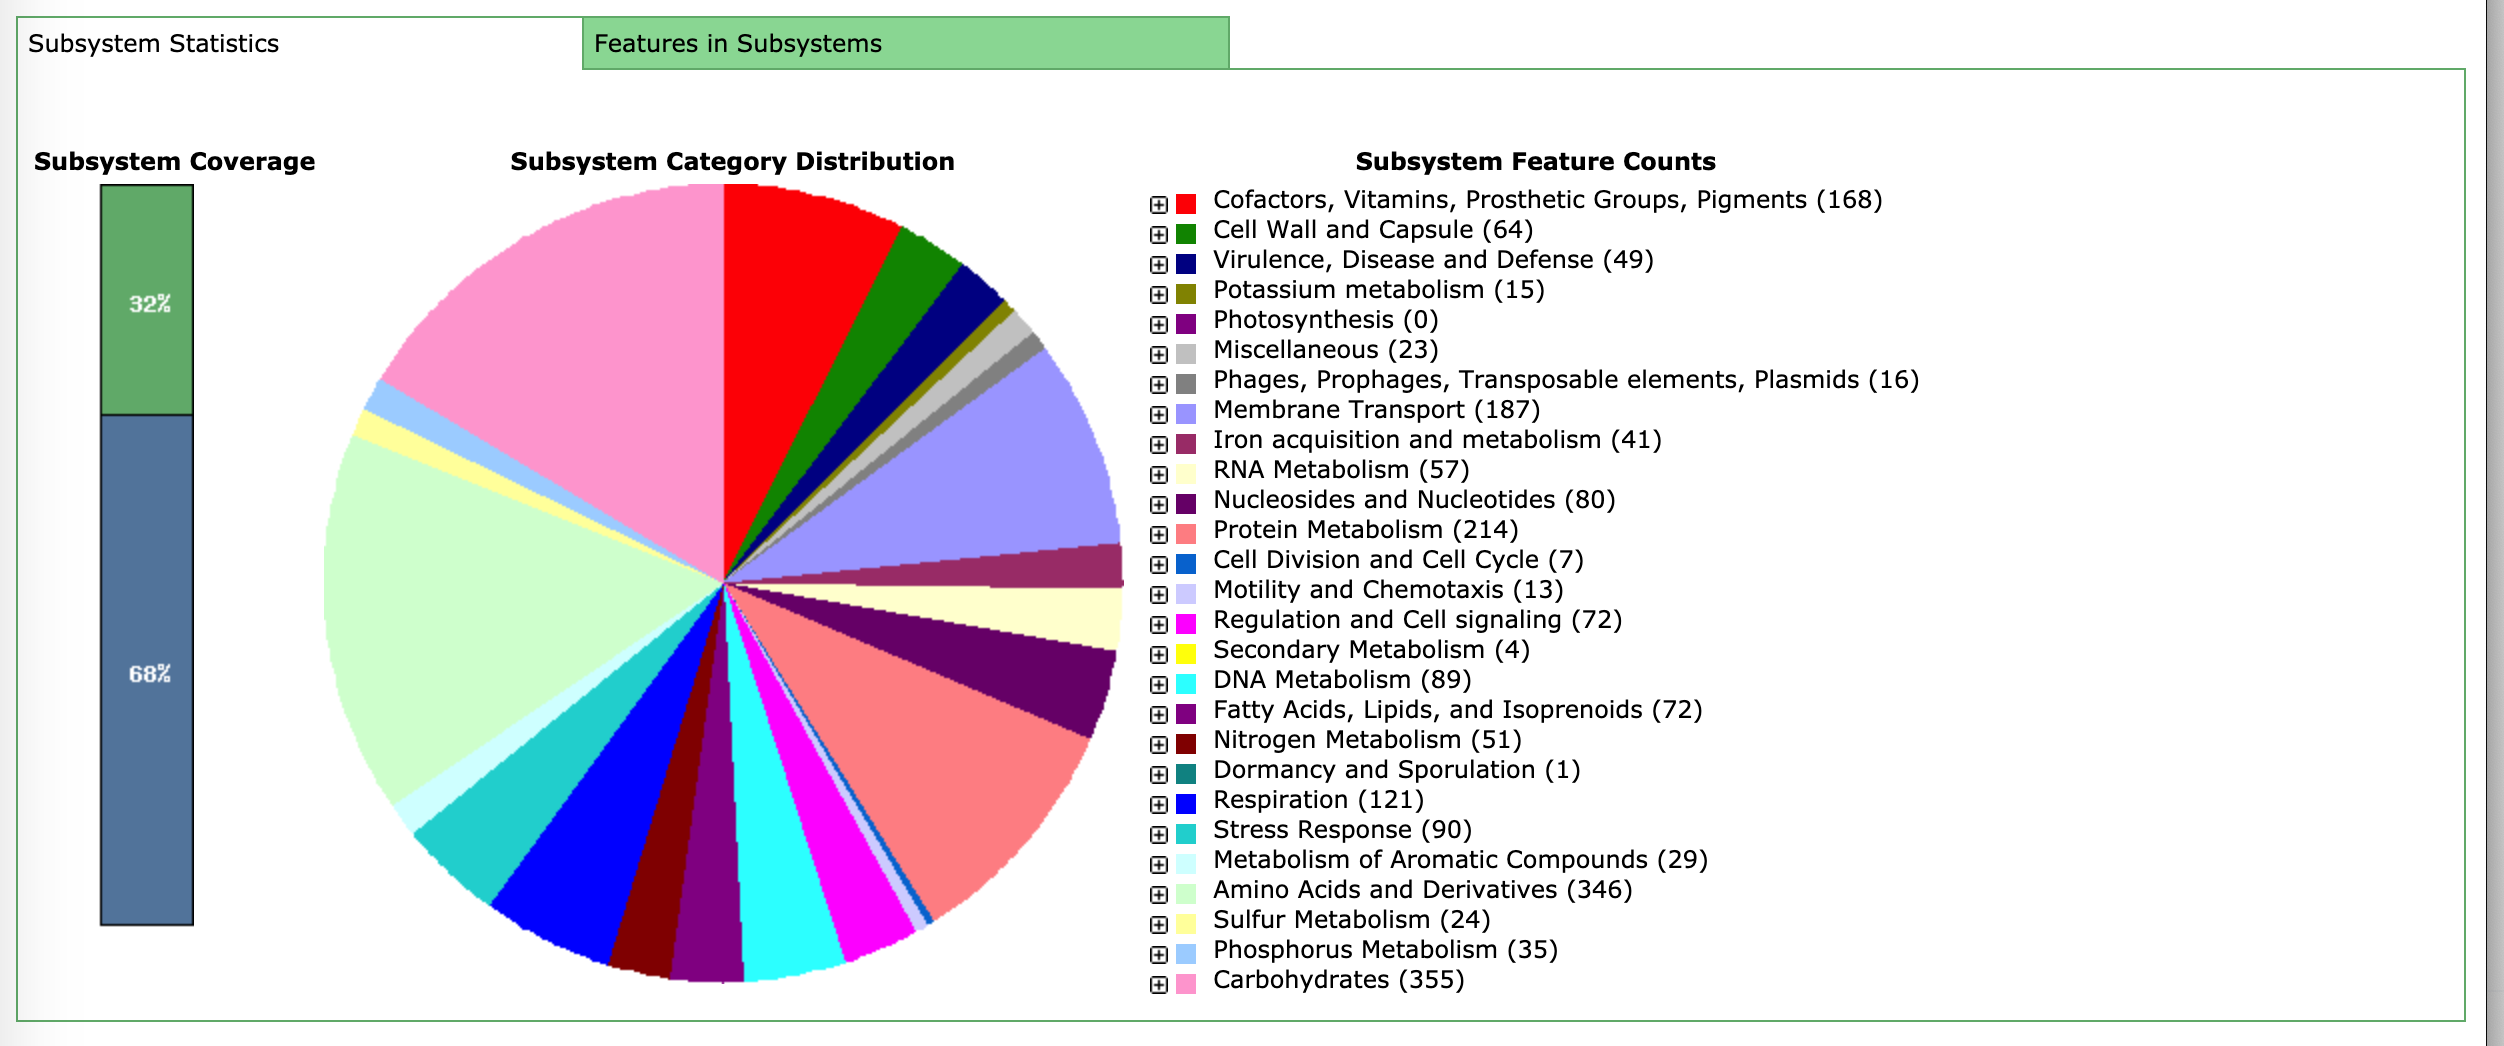

In [5]:
Image("RAST_7.png", width=1000, height=1000) 

#### RAST Analysis:
From the above chart, the carbohydrate, the membrane transport, and protein metabolism subsystems take up relatively portions of the total category distribution. The Salmonella enterica species might have very active cell membranes for nutrients transport and self-protection. One of the possibilities might be it is controlling is membrane permeability to increase survival rate under harsh circumstances and protects against antibiotics. A change in bacterial outer membrane permeability during infection could protect bacteria from toxic environments produced by the host's immune system and promotes effective colonization of the host.   

Reference: Salmonella Rapidly Regulates Membrane Permeability To Survive Oxidative Stress Joris van der Heijden, Lisa A. Reynolds, Wanyin Deng, Allan Mills, Roland Scholz, Koshi Imami, Leonard J. Foster, Franck Duong, B. Brett Finlay
mBio Aug 2016, 7 (4) e01238-16; DOI: 10.1128/mBio.01238-16


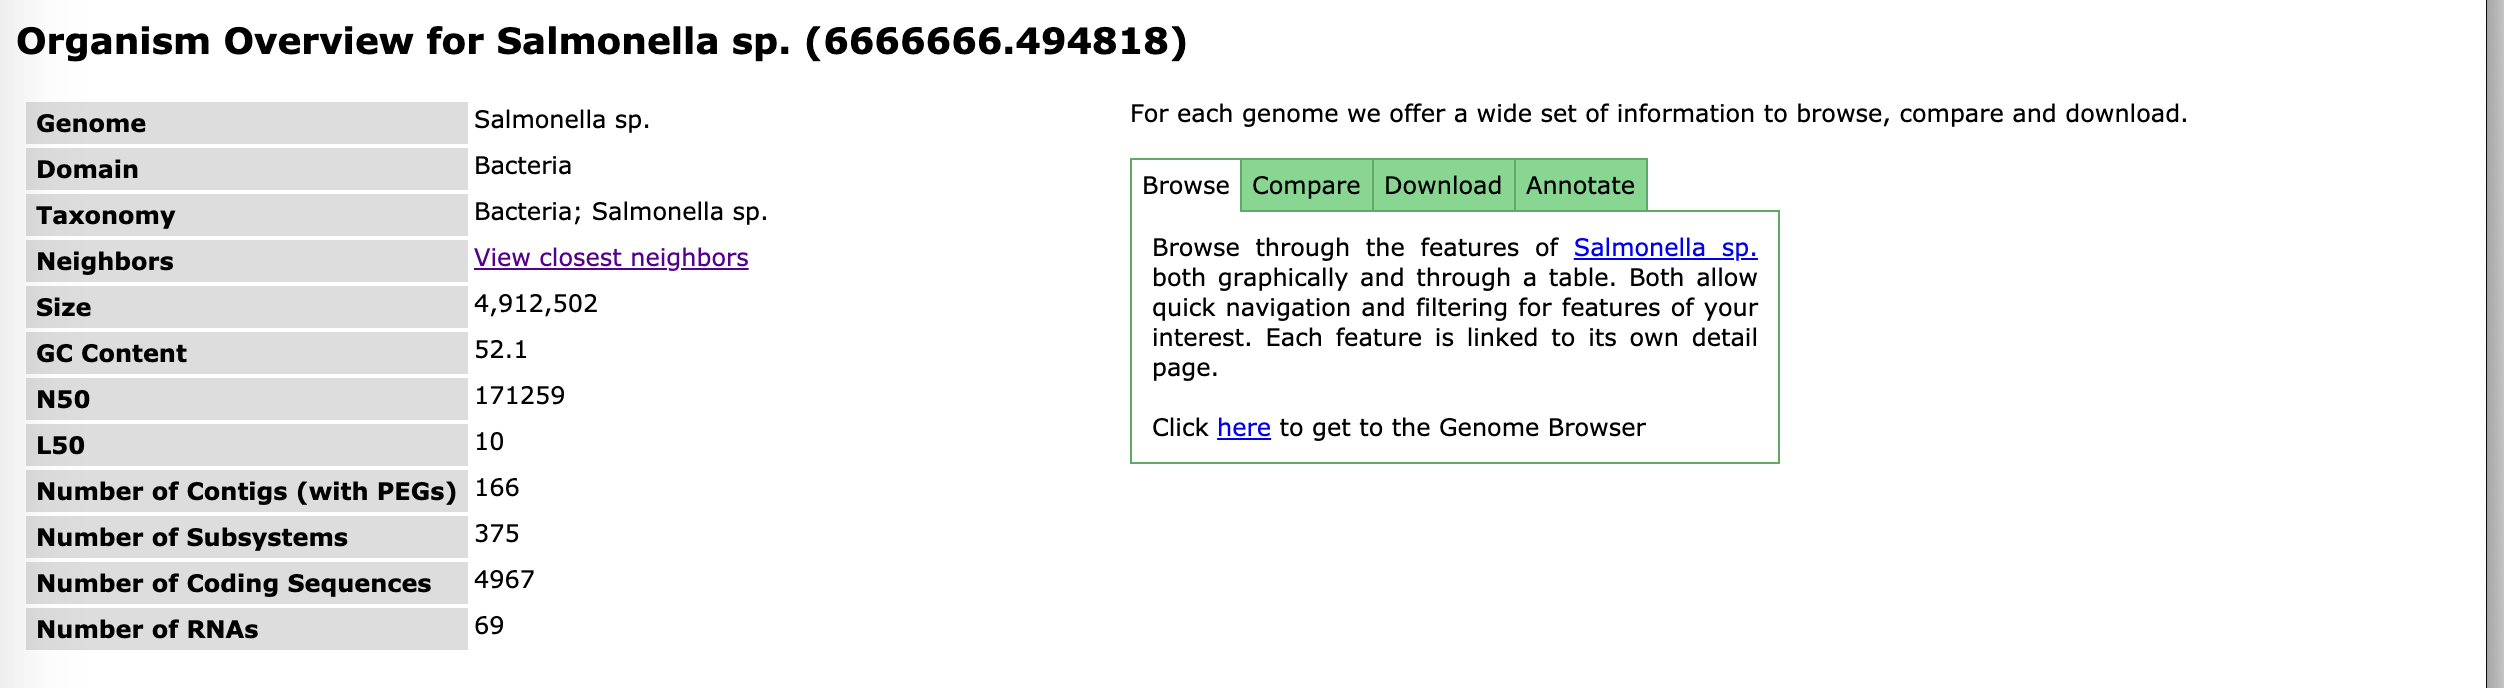

In [6]:
Image("RAST_7_overview.png", width=1000, height=1000) 

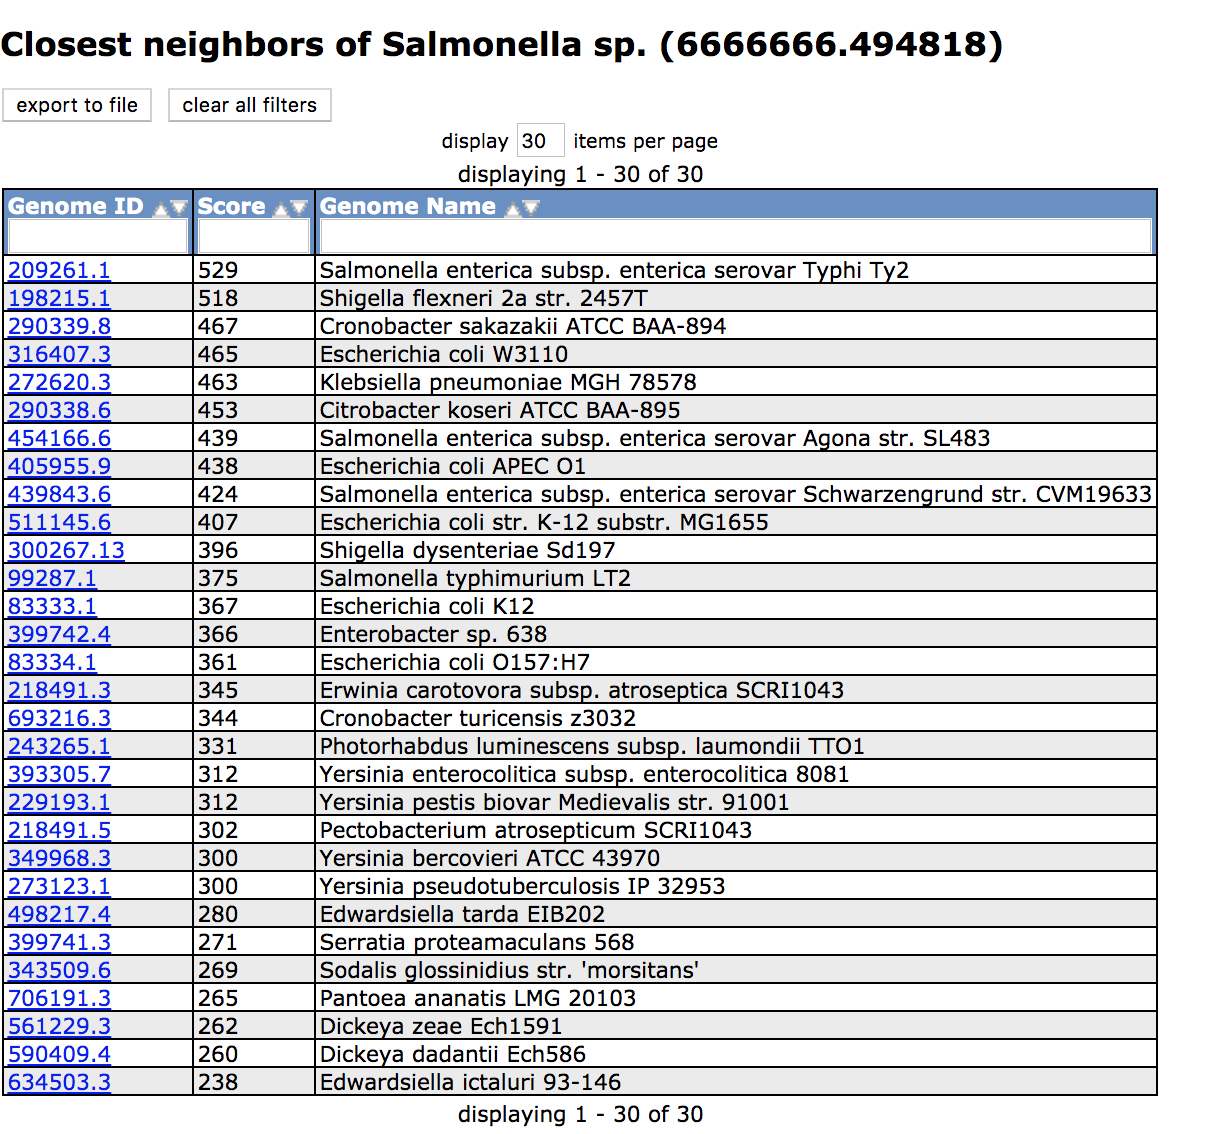

In [9]:
Image("RAST_close.png", width=500, height=1000) 

From RAST analysis, we can conclude that our species is Salmonella enterica.  
Which means, the Proteus genus from SeqMatch could be due to contamination. 

### One Codex Analysis

**Introduction:**   
One Codex identifies microbial sequences using a “k-mer based” taxonomic classification algorithm through a web-based data platform, using a reference database that currently includes approximately 40,000 bacterial, viral, fungal, and protozoan genomes.   
One Codex: A Sensitive and Accurate Data Platform for Genomic Microbial Identification Samuel S. Minot, Niklas Krumm, Nicholas B. Greenfield bioRxiv 027607; doi: https://doi.org/10.1101/027607

**Result from One Codex Analysis:**    
This is an isolate/low-complexity sample of Salmonella enterica. In the sample, 42.77% of reads (n=71) are specific to Salmonella enterica. Overall, 74.7% of 166 reads were classified using the One Codex database. An additional 6.63% of reads were classified, but are non-specific or host reads.

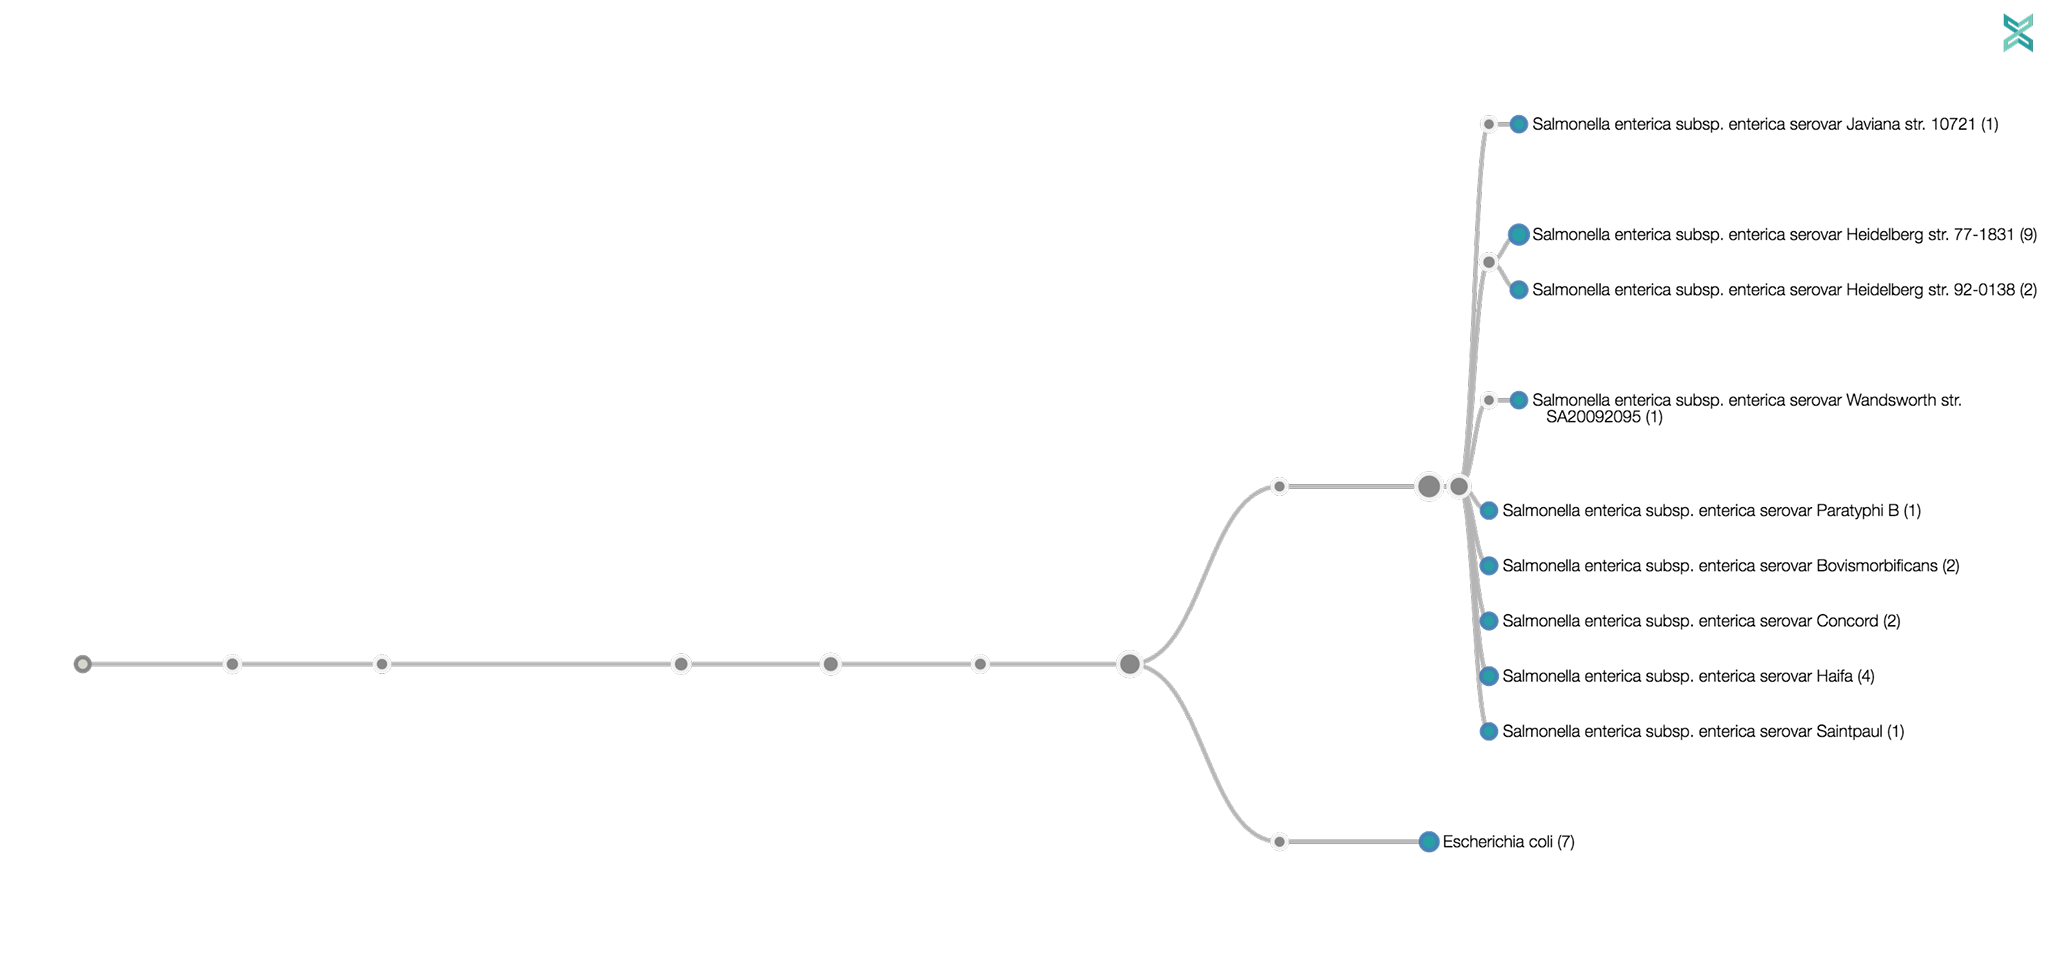

In [10]:
Image("onecodex_1.png", width=1000, height=1000) 

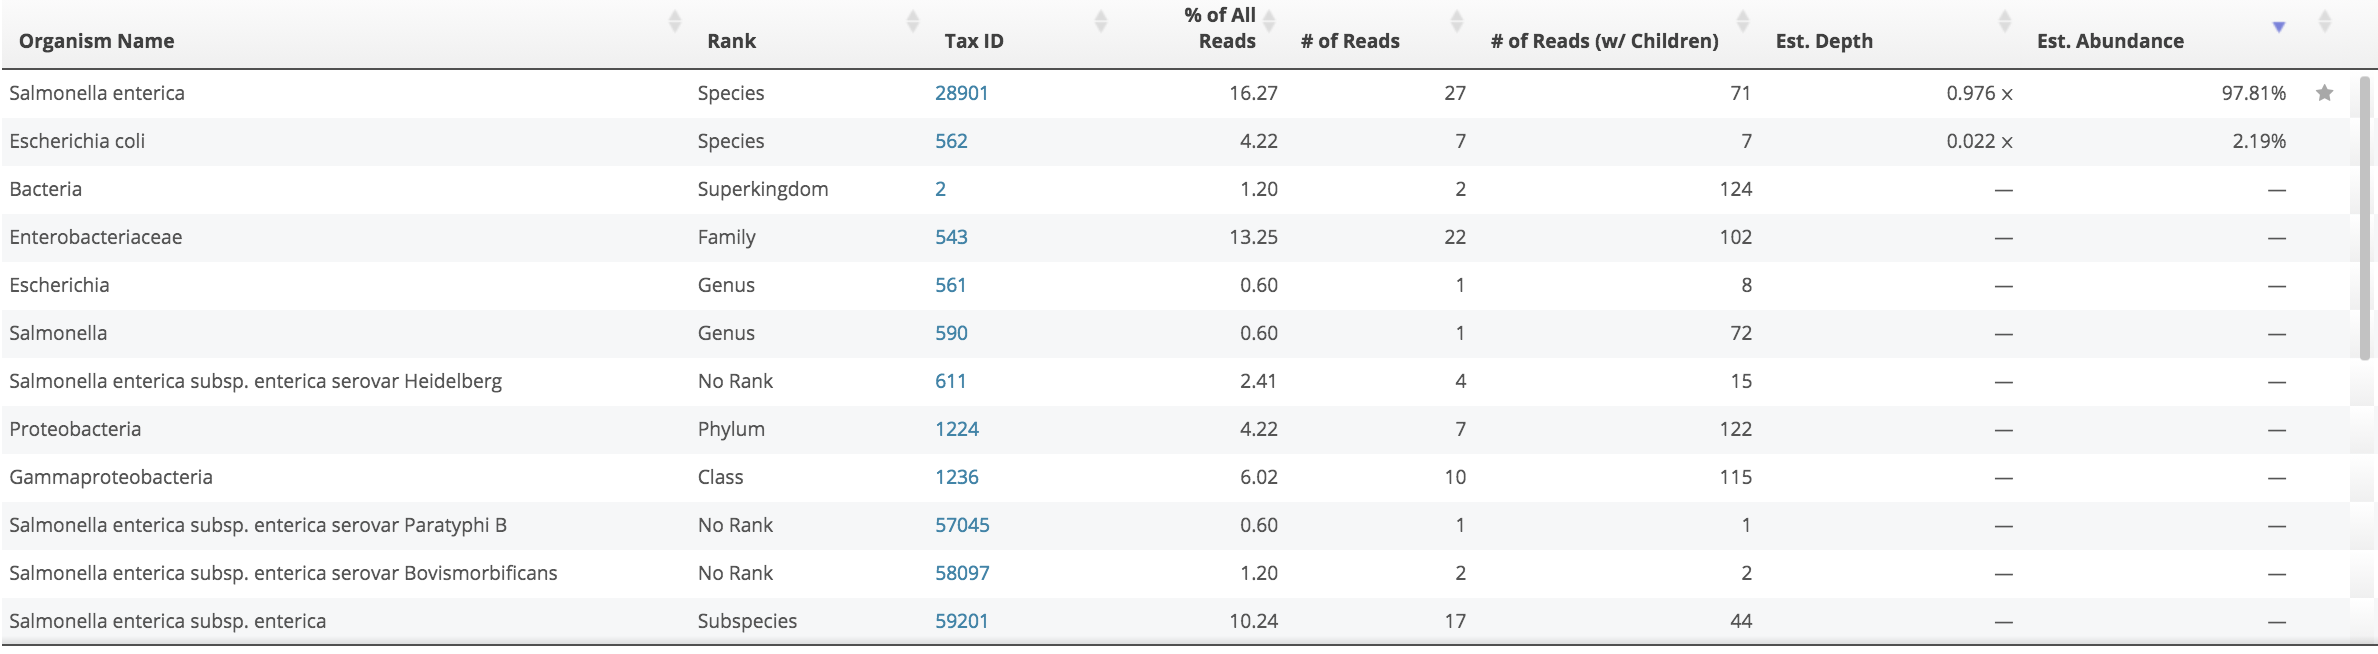

In [12]:
Image("onecodex_2.png", width=1000, height=1000) 

Conclusion: Our One Codex result confirmed that our species is Salmonella enterica. However, it showed the second source of DNA is from Escherichia Coli, not from genus Proteus. There is an inconsistency in two the databases/ annotation tools. We would need further analysis to understand which genus by separating the Salmonella sequence and the other part of the sequence, for example using Bowtie2. However, this might be extremely hard since we don't have a reference sequence/database. 